In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
from sklearn.model_selection import train_test_split

from src.data import Data
from src.evaluation import Evaluation
from src.explanation import report_model
from src.feature_engineering import FeatureEngineering, FeatureSelection
from src.genetic_algorithm import GeneticAlgorithm
from src.model import Model
from src.model_selection import ModelSelection
from src.preprocessing import DataPreprocessor

In [68]:
data = Data()
essays = data.load()

In [69]:
data_preprocessor = DataPreprocessor()
preprocessed_data = data_preprocessor.preprocess(essays)

In [70]:
feature_selection = FeatureSelection()
X, y = feature_selection.extract_features_and_labels(preprocessed_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
feature_engineering = FeatureEngineering("one_hot_encoding")
feature_engineering.fit(X_train)
X_train_transformed = feature_engineering.transform(X_train)
X_test_transformed = feature_engineering.transform(X_test)

In [72]:
model_selection = ModelSelection()
model_selection.fit(X_train_transformed, y_train, X_test_transformed, y_test)

100%|██████████| 42/42 [00:09<00:00,  4.35it/s]

| Model                         |   Adjusted R-Squared |    R-Squared |         RMSE |   Time Taken |
|:------------------------------|---------------------:|-------------:|-------------:|-------------:|
| ExtraTreesRegressor           |          0.573974    |  0.882476    | 11.4926      |   0.105962   |
| RandomForestRegressor         |          0.53457     |  0.871606    | 12.0123      |   0.117944   |
| XGBRegressor                  |          0.531586    |  0.870782    | 12.0508      |   0.489414   |
| GradientBoostingRegressor     |          0.52851     |  0.869934    | 12.0903      |   0.042027   |
| BaggingRegressor              |          0.490481    |  0.859443    | 12.5684      |   0.021909   |
| LGBMRegressor                 |          0.487358    |  0.858581    | 12.6069      |   0.514671   |
| HistGradientBoostingRegressor |          0.481807    |  0.85705     | 12.6749      |   1.89881    |
| ExtraTreeRegressor            |          0.430077    |  0.84278     | 13.2926   

In [73]:
model = Model(model_class=model_selection.get_best_model_class())
model.fit(X_train_transformed, y_train)
predictions = model.predict(X_train_transformed)

Root Mean Squared Error: 4.530033477036013
Mean Absolute Error: 1.443031476997608
R2 Score: 0.9788548043788807


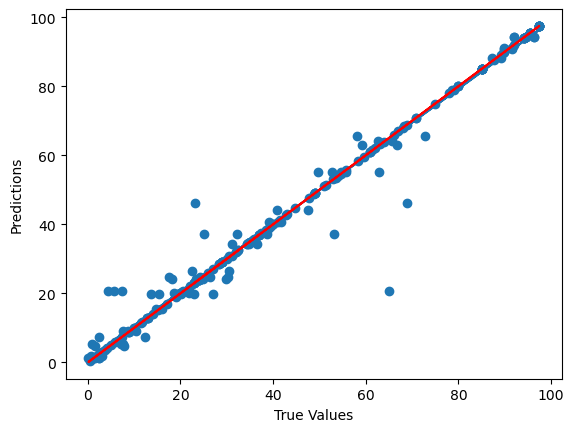

In [74]:
evaluation = Evaluation()
evaluation.report(y_train, predictions)

Root Mean Squared Error: 11.549131184627274
Mean Absolute Error: 8.365997497982262
R2 Score: 0.8813166692344624


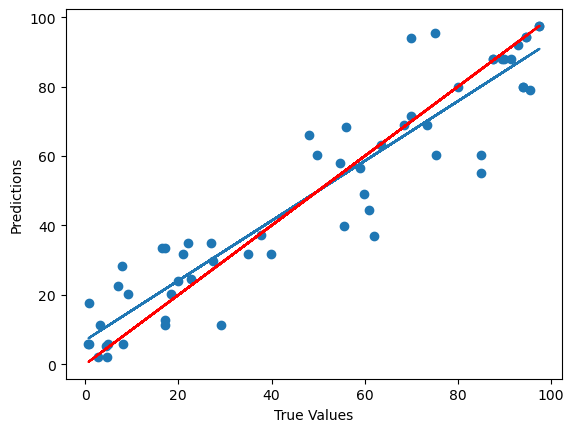

In [75]:
evaluation.report(y_test, model.predict(X_test_transformed))

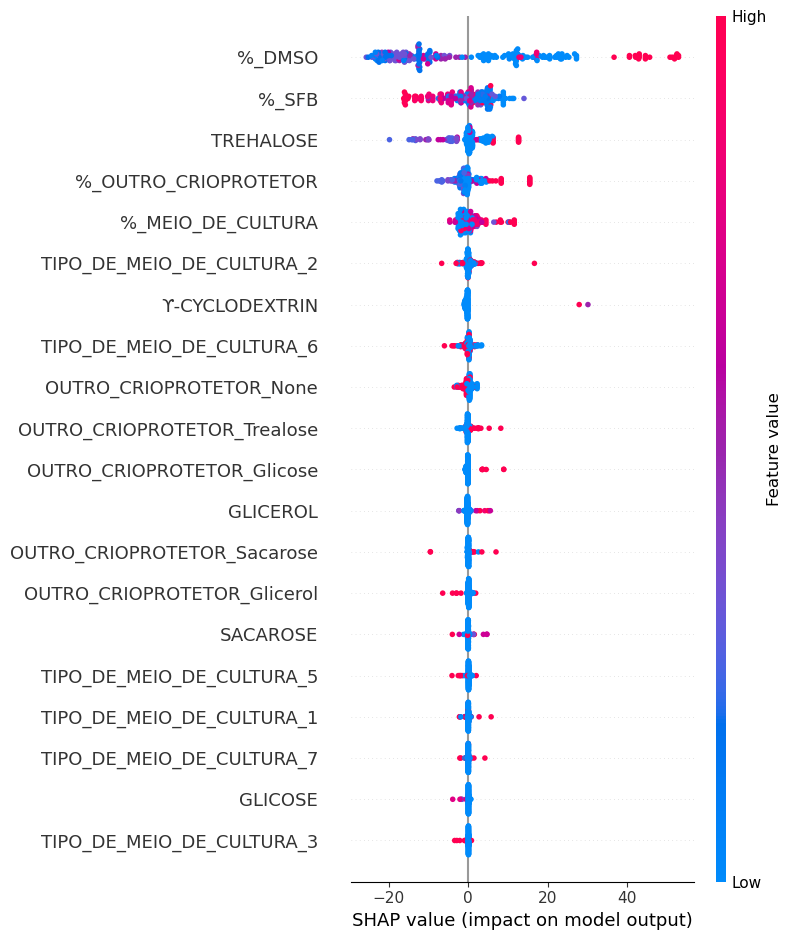

In [81]:
report_model(model, X_train_transformed)

In [86]:
genetic_algorithm = GeneticAlgorithm(
    X_train_transformed,
    model,
    population_size=30,
    max_generations=1000,
)
genetic_algorithm.fit()
genetic_algorithm.report_best_individual()

Best individual:
|                                   |   0 |
|:----------------------------------|----:|
| RAFFINOSE                         |   0 |
| TREHALOSE                         |   0 |
| ϒ-CYCLODEXTRIN                    |   0 |
| MALTOPENTAOSE                     |   0 |
| LACTOSE                           |   0 |
| Di-rhamnolipids                   |   0 |
| SACAROSE                          |   0 |
| %_DMSO                            |   2 |
| MALTOTETRAOSE                     |   0 |
| GLICEROL                          |   0 |
| MALTOHEPTAOSE                     |   0 |
| %_MEIO_DE_CULTURA                 |   0 |
| MALTOTRIOSE                       |   0 |
| MALTOSE                           |   0 |
| %_SOLUÇÃO_TOTAL                   | 100 |
| %_OUTRO_CRIOPROTETOR              |   0 |
| DEXTRAN                           |   0 |
| GLICOSE                           |   0 |
| MALTOEXAOSE                       |   0 |
| %_SFB                             |  98 |
| TIPO_DE_MEIO_

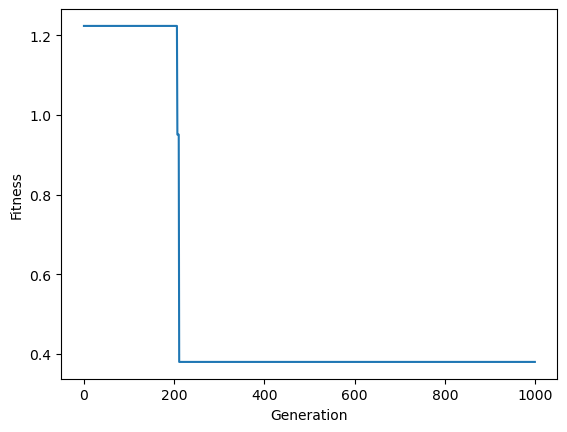

In [87]:
genetic_algorithm.show_history()